In [85]:
%load_ext autoreload
%autoreload 2

from data_extraction import get_dataset_from_dir, get_augmented_graph
import pickle
import matplotlib.pyplot as plt
import numpy as np


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
%%time
methods_source, methods_names, method_graphs = get_dataset_from_dir("../corpus/r252-corpus-features/")

A total of 9023 files have been found
Extracting data from file 1
Extracting data from file 2
Extracting data from file 3
Extracting data from file 4
Extracting data from file 5
Extracting data from file 6
Extracting data from file 7
Extracting data from file 8
Extracting data from file 9
Extracting data from file 10
Extracting data from file 11
Extracting data from file 12
Extracting data from file 13
Extracting data from file 14
Extracting data from file 15
Extracting data from file 16
Extracting data from file 17
Extracting data from file 18
Extracting data from file 19
Extracting data from file 20
Extracting data from file 21
Extracting data from file 22
Extracting data from file 23
Extracting data from file 24
Extracting data from file 25
Extracting data from file 26
Extracting data from file 27
Extracting data from file 28
Extracting data from file 29
Extracting data from file 30
Extracting data from file 31
Extracting data from file 32
Extracting data from file 33
Extracting dat

In [87]:
pickle.dump({'methods_source': methods_source, 'methods_names': methods_names, 'method_graphs': method_graphs}, open('data/methods_data.pkl', 'wb'))


## Methods Analysis

In [4]:
data = pickle.load(open('data/methods_tokens_data.pkl', 'rb'))
methods_source = data['methods_source']
methods_names = data['methods_names']
method_graphs = data['method_graphs']

In [5]:
print("The repo contains {} methods".format(len(methods_names)))

The repo contains 88479 methods


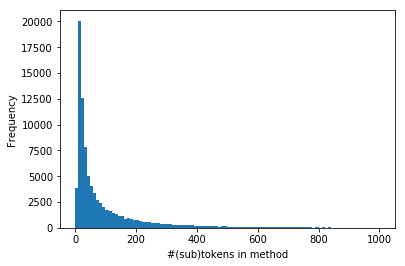

In [14]:
methods_length = [len(method) for method in methods_source]
plt.xlabel('#(sub)tokens in method')
plt.ylabel('Frequency')
a = plt.hist(methods_length, bins=100, range=(0, 1000), )
plt.savefig("plots/tokens_per_method.png")

The average number of sub-identifiers in a method name is: 2.807434532487935


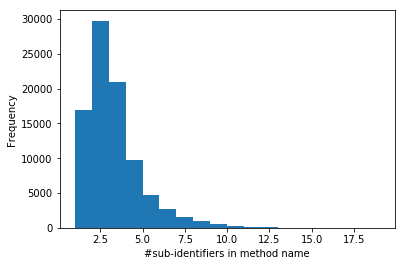

In [15]:
methods_names_length = [len(method_name) for method_name in methods_names]
print("The average number of sub-identifiers in a method name is: {}".format(np.mean(methods_names_length)))
plt.xlabel('#sub-identifiers in method name')
plt.ylabel('Frequency')
a = plt.hist(methods_names_length, bins=range(1, 20))
plt.savefig("plots/tokens_per_method_name.png")

In [76]:
path = "../features-javac-master/Test.java.proto"
from graph_pb2 import Graph

with open(path, "rb") as f:
    g = Graph()
    g.ParseFromString(f.read())

In [77]:
g.edge

[sourceId: 0
destinationId: 1
type: AST_CHILD
, sourceId: 1
destinationId: 2
type: AST_CHILD
, sourceId: 2
destinationId: 3
type: AST_CHILD
, sourceId: 3
destinationId: 4
type: AST_CHILD
, sourceId: 2
destinationId: 5
type: AST_CHILD
, sourceId: 5
destinationId: 6
type: AST_CHILD
, sourceId: 6
destinationId: 7
type: AST_CHILD
, sourceId: 7
destinationId: 8
type: AST_CHILD
, sourceId: 6
destinationId: 9
type: AST_CHILD
, sourceId: 9
destinationId: 10
type: AST_CHILD
, sourceId: 6
destinationId: 11
type: AST_CHILD
, sourceId: 11
destinationId: 12
type: AST_CHILD
, sourceId: 12
destinationId: 13
type: AST_CHILD
, sourceId: 13
destinationId: 14
type: AST_CHILD
, sourceId: 14
destinationId: 17
type: AST_CHILD
, sourceId: 17
destinationId: 18
type: AST_CHILD
, sourceId: 14
destinationId: 19
type: AST_CHILD
, sourceId: 19
destinationId: 20
type: AST_CHILD
, sourceId: 21
destinationId: 22
type: NEXT_TOKEN
, sourceId: 22
destinationId: 23
type: NEXT_TOKEN
, sourceId: 23
destinationId: 24
type: 

In [78]:
g.node

[id: 0
type: AST_ELEMENT
contents: "COMPILATION_UNIT"
startPosition: 0
endPosition: 100
startLineNumber: 1
endLineNumber: 8
, id: 1
type: FAKE_AST
contents: "TYPE_DECLS"
startPosition: 0
endPosition: 100
startLineNumber: 1
endLineNumber: 8
, id: 2
type: AST_ELEMENT
contents: "CLASS"
startPosition: 0
endPosition: 100
startLineNumber: 1
endLineNumber: 8
, id: 3
type: FAKE_AST
contents: "MODIFIERS"
startPosition: 0
endPosition: 6
startLineNumber: 1
endLineNumber: 1
, id: 4
type: AST_ELEMENT
contents: "MODIFIERS"
startPosition: 0
endPosition: 6
startLineNumber: 1
endLineNumber: 1
, id: 5
type: FAKE_AST
contents: "MEMBERS"
startPosition: 46
endPosition: 97
startLineNumber: 4
endLineNumber: 6
, id: 6
type: AST_ELEMENT
contents: "METHOD"
startPosition: 46
endPosition: 97
startLineNumber: 4
endLineNumber: 6
, id: 7
type: FAKE_AST
contents: "MODIFIERS"
startPosition: 46
endPosition: 52
startLineNumber: 4
endLineNumber: 4
, id: 8
type: AST_ELEMENT
contents: "MODIFIERS"
startPosition: 46
endPosit

In [79]:
len(g.node)

40

In [80]:
graph = get_augmented_graph(g)

In [81]:
graph.edges.data()

EdgeDataView([(0, 1, {'edge_type': 'AST_CHILD'}), (0, 22, {'edge_type': 'ASSOCIATED_TOKEN'}), (0, 23, {'edge_type': 'ASSOCIATED_TOKEN'}), (0, 24, {'edge_type': 'ASSOCIATED_TOKEN'}), (0, 38, {'edge_type': 'ASSOCIATED_TOKEN'}), (1, 2, {'edge_type': 'AST_CHILD'}), (2, 3, {'edge_type': 'AST_CHILD'}), (2, 5, {'edge_type': 'AST_CHILD'}), (2, 39, {'edge_type': 'ASSOCIATED_SYMBOL'}), (3, 4, {'edge_type': 'AST_CHILD'}), (4, 21, {'edge_type': 'ASSOCIATED_TOKEN'}), (5, 6, {'edge_type': 'AST_CHILD'}), (6, 7, {'edge_type': 'AST_CHILD'}), (6, 9, {'edge_type': 'AST_CHILD'}), (6, 11, {'edge_type': 'AST_CHILD'}), (6, 29, {'edge_type': 'ASSOCIATED_TOKEN'}), (6, 30, {'edge_type': 'ASSOCIATED_TOKEN'}), (6, 43, {'edge_type': 'ASSOCIATED_SYMBOL'}), (6, 26, {'edge_type': 'COMMENT'}), (6, 46, {'edge_type': 'AST_CHILD'}), (7, 8, {'edge_type': 'AST_CHILD'}), (8, 25, {'edge_type': 'ASSOCIATED_TOKEN'}), (9, 10, {'edge_type': 'AST_CHILD'}), (10, 27, {'edge_type': 'ASSOCIATED_TOKEN'}), (11, 12, {'edge_type': 'AST_C